# EDA : E-commerce

In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
import os
os.getcwd()

'C:\\Users\\rahul.goyal\\Desktop\\Data Science\\Machine Learning\\Projects'

In [5]:
customers =  pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

In [ ]:
### Hypothesis
1. With the analysis of the dataset we could answer, which product have the highest rating
2. Which location have the highest sale
3. Which products are getting low reviews
4. Basis on the ratings, sale of that product increses or not
5. How negative rating impact the product sales

In [6]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
reviews.shape

(99224, 7)

In [8]:
reviews['order_id'].unique()

array(['73fc7af87114b39712e6da79b0a377eb',
       'a548910a1c6147796b98fdf73dbeba33',
       'f9e4b658b201a9f2ecdecbb34bed034b', ...,
       '55d4004744368f5571d1f590031933e4',
       '7725825d039fc1f0ceb7635e3f7d9206',
       '90531360ecb1eec2a1fbb265a0db0508'], dtype=object)

In [9]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
payments.shape

(103886, 5)

In [11]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
orders.shape

(99441, 8)

In [13]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [14]:
customers.shape

(99441, 5)

### Merging datasets

In [15]:
#### Merge Review and order datasets
reviews_orders = reviews.merge(orders, on = 'order_id')

In [16]:
reviews_orders.shape

(99224, 14)

In [17]:
#### Merge reviews_orders and payments dataset
reviews_orders_payments = reviews_orders.merge(payments, on = 'order_id')

In [18]:
reviews_orders_payments.shape

(103677, 18)

In [19]:
reviews_orders_payments.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00,1,credit_card,8,397.26
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00,1,credit_card,1,88.09
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00,1,credit_card,1,194.12
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00,1,credit_card,1,222.84
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09 00:00:00,1,credit_card,10,1333.25


In [20]:
reviews_orders_payments_customers = reviews_orders_payments.merge(customers, on='customer_id')

In [21]:
reviews_orders_payments_customers.shape

(103677, 22)

In [22]:
items.shape

(112650, 7)

In [23]:
items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [24]:
### Merging reviews_orders_payments_customers with items dataset
cust_items = reviews_orders_payments_customers.merge(items, on = 'order_id')
cust_items.shape

(117329, 28)

In [25]:
len(cust_items['product_id'].unique())

32789

In [26]:
cust_items.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP,2,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,...,64190b91b656ab8f37eb89b93dc84584,13380,nova odessa,SP,1,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,...,1d47144362c14e94ccdd213e8ec277d5,44571,santo antonio de jesus,BA,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,...,c8cf6cb6b838dc7a33ed199b825e8616,88735,gravatal,SC,1,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85


In [27]:
products.shape

(32951, 9)

In [28]:
# Merging cust_items and products datasets
cust_items_products = cust_items.merge(products, on = 'product_id')
cust_items_products.shape

(117329, 36)

In [29]:
cust_items_products.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,185.00,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,185.00,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
2,e2655da8bccce2ddc2f43cc2c80d24f3,19721d59a9764437477eff0730b48665,5,NaN,NaN,2018-04-10 00:00:00,2018-04-11 11:30:43,b1757da2a461d581e1a3b280ca181b7c,delivered,2018-03-26 11:02:31,...,185.00,20.26,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
3,cb18f53b563f0bdeb76be0376ddd6b6a,efd626e6a12a82d76e456e34093f8356,5,NaN,NaN,2017-12-28 00:00:00,2017-12-30 12:07:50,da2bd16b131bc90653b87fe4d8fd266e,delivered,2017-12-07 20:33:24,...,185.00,17.05,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
4,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,...,79.79,8.30,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0


In [30]:
len(cust_items_products['seller_id'].unique())

3090

In [31]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [32]:
### Merge cust_items_products and seller dataset
items_products_sellers = cust_items_products.merge(sellers, on = 'seller_id')
items_products_sellers.shape

(117329, 39)

In [33]:
items_products_sellers.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,14600,sao joaquim da barra,SP
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,14600,sao joaquim da barra,SP
2,e2655da8bccce2ddc2f43cc2c80d24f3,19721d59a9764437477eff0730b48665,5,NaN,NaN,2018-04-10 00:00:00,2018-04-11 11:30:43,b1757da2a461d581e1a3b280ca181b7c,delivered,2018-03-26 11:02:31,...,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,14600,sao joaquim da barra,SP
3,cb18f53b563f0bdeb76be0376ddd6b6a,efd626e6a12a82d76e456e34093f8356,5,NaN,NaN,2017-12-28 00:00:00,2017-12-30 12:07:50,da2bd16b131bc90653b87fe4d8fd266e,delivered,2017-12-07 20:33:24,...,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,14600,sao joaquim da barra,SP
4,5fdb2ed7aa0f1b1c9642175b302e38af,b0bc656fed47584c160f8cff2d7b8bbd,5,NaN,NaN,2018-03-17 00:00:00,2018-03-17 17:36:27,f4ad1c9eb0bed4469cbe0ff8f47bf634,delivered,2018-02-27 13:56:12,...,47.0,858.0,1.0,1600.0,30.0,30.0,35.0,14600,sao joaquim da barra,SP


In [34]:
geolocation.shape

(1000163, 5)

In [35]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [36]:
len(geolocation['geolocation_zip_code_prefix'].unique())

19015

In [37]:
items_products_sellers.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state'],
      dtype='object')

In [38]:
geoloc_df = geolocation.groupby('geolocation_zip_code_prefix').mean().reset_index()
geoloc_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733
...,...,...,...
19010,99960,-27.953722,-52.025511
19011,99965,-28.183372,-52.039850
19012,99970,-28.343766,-51.874689
19013,99980,-28.389129,-51.843836


In [39]:
# Final data after merging
final_df = items_products_sellers.merge(geoloc_df, left_on = 'customer_zip_code_prefix', right_on = 'geolocation_zip_code_prefix')

In [40]:
final_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,1300.0,30.0,30.0,35.0,14600,sao joaquim da barra,SP,6030,-23.557079,-46.767579
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,1300.0,30.0,30.0,35.0,14600,sao joaquim da barra,SP,6030,-23.557079,-46.767579
2,238e50e85af6df5121c9978eb61f52dc,5a32dae759e50279bf8e1b2be65edd27,4,NaN,NaN,2017-10-02 00:00:00,2017-10-02 16:58:22,6b5aaff0e495149ec28705162bba2fe4,delivered,2017-09-28 23:13:40,...,250.0,17.0,6.0,12.0,13324,salto,SP,6030,-23.557079,-46.767579
3,f4e0a5f2050ea33c9567478c2c4805ae,c7873fbbe3a42117a53be238d9b734f3,3,NaN,NaN,2018-05-01 00:00:00,2018-05-02 11:09:50,e13363e1db087b7d98c27f9b9405d793,delivered,2018-04-27 08:44:03,...,200.0,25.0,7.0,16.0,1212,sao paulo,SP,6030,-23.557079,-46.767579
4,314adfed9c9ebb83c3021c3b703daf0f,44fb0b3fb29ddaedf3fe5bd4a99e7495,5,Produto Recusado,"O produto chegou a ser entregue, porém foi rec...",2018-07-28 00:00:00,2018-07-28 23:58:51,0d7b652454b643aca094cbdbd5080867,delivered,2018-07-21 19:08:07,...,1650.0,30.0,22.0,30.0,15025,sao jose do rio preto,SP,6030,-23.557079,-46.767579


In [41]:
final_df.shape 

(117013, 42)

In [42]:
final_df.to_csv('C:\\Users\\rahul.goyal\\Desktop\\Data Science\\Machine Learning/Projects/final_data.csv')

In [43]:
df = pd.read_csv('final_data.csv')

In [44]:
df.shape

(117013, 43)

In [45]:
### Checking Null values
df.isnull().sum()

Unnamed: 0                            0
review_id                             0
order_id                              0
review_score                          0
review_comment_title             103166
review_comment_message            67464
review_creation_date                  0
review_answer_timestamp               0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1228
order_delivered_customer_date      2457
order_estimated_delivery_date         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0


In [45]:
'''from scipy.stats import pearsonr
a = df['review_id']
b = df['review_score']
pearsonr(a,b)
''''

SyntaxError: EOL while scanning string literal (Temp/ipykernel_220/2227158062.py, line 5)

In [45]:
df.columns

Index(['Unnamed: 0', 'review_id', 'order_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'geolocation_zip_code_prefix',
       'geolocation_lat', 'geolocation_ln

In [46]:
## Columns which are unique and has lot of missing values
columns = ['Unnamed: 0', 'review_id', 'order_id', 'review_comment_title', 'review_comment_message', 
           'customer_id', 'customer_unique_id', 'order_approved_at', 'order_delivered_carrier_date',
           'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date','geolocation_zip_code_prefix', 
           'geolocation_lat', 'geolocation_lng', 'review_creation_date', 'review_answer_timestamp', 'order_purchase_timestamp',
           'order_delivered_customer_date', 'order_estimated_delivery_date']

In [47]:
data=df.copy()

In [48]:
data=data.drop(columns, axis=1)

In [49]:
data.shape

(117013, 22)

In [50]:
## Renaming the columns
data = data.rename(columns={'product_description_lenght': 'product_description_length'})
data = data.rename(columns={'product_name_lenght': 'product_name_length'})

<AxesSubplot:>

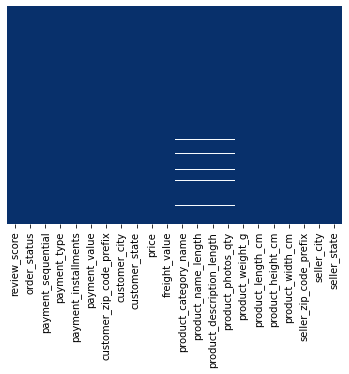

In [51]:
sns.heatmap(data.isnull(), cmap='Blues_r', cbar=False, yticklabels=False )

### Handling Missing values

In [52]:
data.isnull().sum()

review_score                     0
order_status                     0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
price                            0
freight_value                    0
product_category_name         1689
product_name_length           1689
product_description_length    1689
product_photos_qty            1689
product_weight_g                20
product_length_cm               20
product_height_cm               20
product_width_cm                20
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
dtype: int64

In [53]:
data['product_name_length'].value_counts()

59.0    8586
60.0    7995
56.0    6786
58.0    6741
57.0    6246
        ... 
7.0        2
69.0       1
66.0       1
68.0       1
76.0       1
Name: product_name_length, Length: 66, dtype: int64

In [54]:
data['product_name_length'].describe()

count    115324.000000
mean         48.768279
std          10.035583
min           5.000000
25%          42.000000
50%          52.000000
75%          57.000000
max          76.000000
Name: product_name_length, dtype: float64

In [55]:
data['product_name_length']=data['product_name_length'].fillna(59.0)

In [56]:
data['product_category_name'] = data['product_category_name'].fillna('other')

In [57]:
data['product_description_length'].value_counts()

341.0     706
1893.0    663
348.0     642
492.0     588
903.0     586
         ... 
3737.0      1
3379.0      1
3295.0      1
2099.0      1
1965.0      1
Name: product_description_length, Length: 2958, dtype: int64

In [58]:
data['product_description_length'].describe()

count    115324.000000
mean        785.873764
std         652.544571
min           4.000000
25%         346.000000
50%         600.000000
75%         983.000000
max        3992.000000
Name: product_description_length, dtype: float64

In [59]:
data['product_description_length']=data['product_description_length'].fillna(786.019339)

In [60]:
data['product_photos_qty'].value_counts() 

1.0     58287
2.0     22829
3.0     12836
4.0      8751
5.0      5552
6.0      3898
7.0      1545
8.0       766
10.0      353
9.0       309
11.0       72
12.0       60
13.0       30
15.0       12
17.0       11
14.0        6
18.0        4
19.0        2
20.0        1
Name: product_photos_qty, dtype: int64

In [61]:
data['product_photos_qty']=data['product_photos_qty'].fillna(1.0)

In [62]:
data['product_weight_g']=data['product_weight_g'].fillna(0)
data['product_length_cm']=data['product_length_cm'].fillna(0)
data['product_height_cm']=data['product_height_cm'].fillna(0)
data['product_width_cm']=data['product_width_cm'].fillna(0)

In [63]:
data.isnull().sum()

review_score                  0
order_status                  0
payment_sequential            0
payment_type                  0
payment_installments          0
payment_value                 0
customer_zip_code_prefix      0
customer_city                 0
customer_state                0
price                         0
freight_value                 0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
seller_zip_code_prefix        0
seller_city                   0
seller_state                  0
dtype: int64

<AxesSubplot:xlabel='review_score', ylabel='count'>

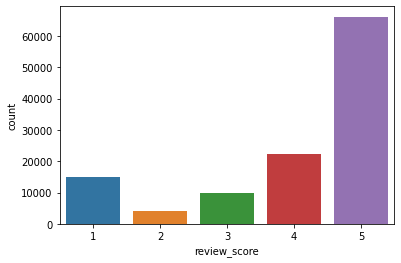

In [67]:
### Check review score distribution
sns.countplot(x='review_score', data=data)

In [68]:
review_score_values = data.review_score.value_counts().values
review_score_values 

array([66085, 22224, 14813,  9818,  4073], dtype=int64)

In [69]:
review_score_category = data.review_score.value_counts().index
review_score_category

Int64Index([5, 4, 1, 3, 2], dtype='int64')

([<matplotlib.patches.Wedge at 0x20005fa6630>,
 [Text(-0.22227509419119273, 1.0773085827664683, '5'),
  Text(-0.5909836965131887, -0.9277598129125918, '4'),
  Text(0.4557520018163305, -1.0011444015927011, '1'),
  Text(0.9745225640724422, -0.5102016974821556, '3'),
  Text(1.0934296013728395, -0.12004876859690723, '2')],
 [Text(-0.12124096046792329, 0.5876228633271645, '56.48%'),
  Text(-0.3223547435526483, -0.5060508070432318, '18.99%'),
  Text(0.2485920009907257, -0.5460787645051096, '12.66%'),
  Text(0.531557762221332, -0.27829183499026666, '8.39%'),
  Text(0.5964161462033669, -0.06548114650740394, '3.48%')])

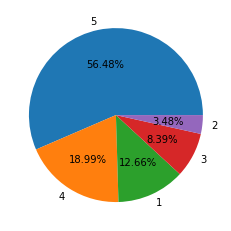

In [70]:
# Pie chart for top review score
plt.pie(review_score_values , labels = review_score_category, autopct = '%1.2f%%')

In [71]:
len(data['customer_state'].unique())

27

In [72]:
data['customer_state'].value_counts()

SP    49510
RJ    15207
MG    13606
RS     6511
PR     5947
SC     4283
BA     4002
GO     2407
ES     2313
DF     2286
PE     1872
CE     1535
MT     1114
PA     1099
MS      854
MA      839
PB      627
PI      565
RN      564
AL      458
SE      394
TO      337
RO      283
AM      170
AC       95
AP       83
RR       52
Name: customer_state, dtype: int64

In [73]:
customer_state_values = data.customer_state.value_counts().values
customer_state_values

array([49510, 15207, 13606,  6511,  5947,  4283,  4002,  2407,  2313,
        2286,  1872,  1535,  1114,  1099,   854,   839,   627,   565,
         564,   458,   394,   337,   283,   170,    95,    83,    52],
      dtype=int64)

In [74]:
customer_state_cat = data.customer_state.value_counts().index
customer_state_cat

Index(['SP', 'RJ', 'MG', 'RS', 'PR', 'SC', 'BA', 'GO', 'ES', 'DF', 'PE', 'CE',
       'MT', 'PA', 'MS', 'MA', 'PB', 'PI', 'RN', 'AL', 'SE', 'TO', 'RO', 'AM',
       'AC', 'AP', 'RR'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x20006009048>,
 [Text(-0.15628601553946206, 1.0888409807436525, 'SP'),
  Text(-0.757348974950024, -0.7977609479926604, 'RJ'),
  Text(0.2590075422205796, -1.0690720710377084, 'MG'),
  Text(0.884318865411923, -0.6542019139964124, 'RS'),
  Text(1.0767868119104553, -0.22478914941722103, 'PR')],
 [Text(-0.08524691756697929, 0.5939132622238104, '54.54%'),
  Text(-0.4130994408818312, -0.4351423352687238, '16.75%'),
  Text(0.14127684121122522, -0.5831302205660227, '14.99%'),
  Text(0.48235574477013976, -0.35683740763440674, '7.17%'),
  Text(0.5873382610420665, -0.12261226331848418, '6.55%')])

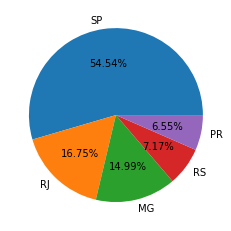

In [75]:
# Pie chart for top 5 state basis on the sales
plt.pie(customer_state_values[:5], labels = customer_state_cat[:5], autopct = '%1.2f%%')

In [76]:
len(data['customer_city'].unique())

4064

<AxesSubplot:xlabel='order_status', ylabel='count'>

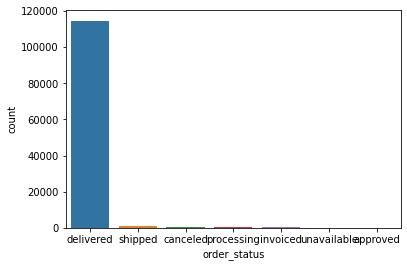

In [77]:
sns.countplot(x='order_status', data=data)

In [78]:
order_status_values = data.order_status.value_counts().values
order_status_values

array([114557,   1160,    548,    369,    369,      7,      3],
      dtype=int64)

In [79]:
order_status_categories = data.order_status.value_counts().index
order_status_categories

Index(['delivered', 'shipped', 'canceled', 'processing', 'invoiced',
       'unavailable', 'approved'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x200060e4e10>,
 [Text(-1.097609473669446, 0.07248064094006186, 'delivered'),
  Text(1.0944236177926019, -0.11062072508238717, 'shipped'),
  Text(1.0983440512824008, -0.06033527171201958, 'canceled'),
  Text(1.099496489297436, -0.03327867218825492, 'processing'),
  Text(1.099940008611898, -0.01148814409980484, 'invoiced'),
  Text(1.0999999330015529, -0.0003839226218385064, 'unavailable'),
  Text(1.0999999964324785, -8.859202668946819e-05, 'approved')],
 [Text(-0.5986960765469704, 0.03953489505821555, '97.90%'),
  Text(0.5969583369777828, -0.060338577317665724, '0.99%'),
  Text(0.5990967552449458, -0.03291014820655613, '0.47%'),
  Text(0.5997253577986014, -0.01815200301177541, '0.32%'),
  Text(0.5999672774246716, -0.006266260418075367, '0.32%'),
  Text(0.5999999634553924, -0.00020941233918463981, '0.01%'),
  Text(0.5999999980540791, -4.832292364880083e-05, '0.00%')])

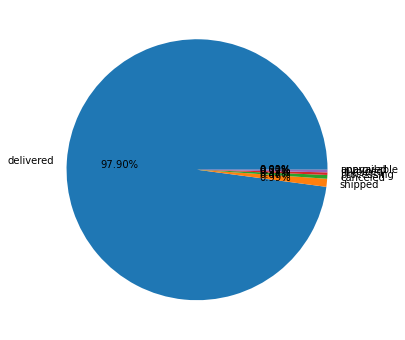

In [80]:
# Pie chart for delivery performance status
plt.figure(figsize=(12,6))
plt.pie(order_status_values, labels=order_status_categories, autopct='%1.2f%%')

In [81]:
data.columns

Index(['review_score', 'order_status', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'price', 'freight_value',
       'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

## Feature Engineering

In [64]:
data['order_status'].unique()

array(['delivered', 'shipped', 'canceled', 'processing', 'invoiced',
       'unavailable', 'approved'], dtype=object)

<AxesSubplot:xlabel='order_status', ylabel='count'>

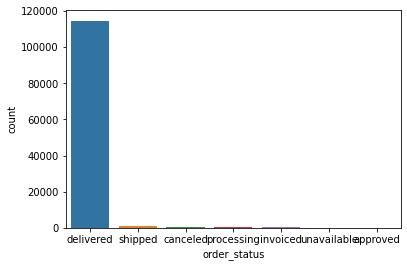

In [65]:
sns.countplot(data=data, x='order_status')

(array([1.14557e+05, 1.16000e+03, 0.00000e+00, 5.48000e+02, 0.00000e+00,
        3.69000e+02, 3.69000e+02, 0.00000e+00, 7.00000e+00, 3.00000e+00]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

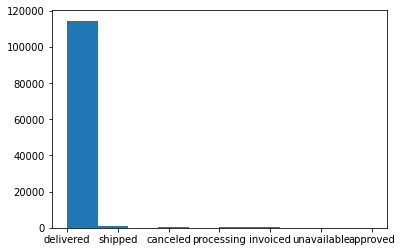

In [66]:
plt.hist(data['order_status'])

<AxesSubplot:xlabel='price'>

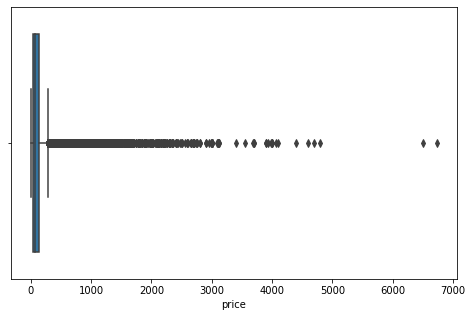

In [67]:
plt.figure(figsize=(8,5))
sns.boxplot(data['price'])

<AxesSubplot:xlabel='review_score', ylabel='price'>

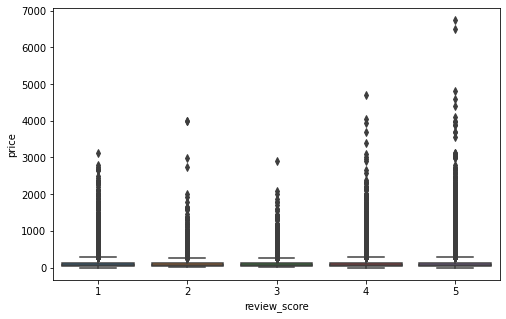

In [68]:
plt.figure(figsize=(8,5))
sns.boxplot(x='review_score', y='price', data=data)

In [69]:
data.shape

(117013, 22)

In [70]:
data.columns

Index(['review_score', 'order_status', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'price', 'freight_value',
       'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [71]:
data['order_status'].unique()

array(['delivered', 'shipped', 'canceled', 'processing', 'invoiced',
       'unavailable', 'approved'], dtype=object)

In [72]:
data['payment_type'].unique()

array(['credit_card', 'debit_card', 'voucher', 'boleto'], dtype=object)

In [64]:
data.to_csv('C:\\Users\\rahul.goyal\\Desktop\\Data Science\\Machine Learning/Projects/clean_ecomm.csv')

# Categorical data

In [73]:
cat_features = [features for features in data.columns if data[features].dtype=='O']
cat_features

['order_status',
 'payment_type',
 'customer_city',
 'customer_state',
 'product_category_name',
 'seller_city',
 'seller_state']

In [74]:
for features in cat_features:
    print('The column is {} and the number of categories are {}'.format(features, len(data[features].unique())))

The column is order_status and the number of categories are 7
The column is payment_type and the number of categories are 4
The column is customer_city and the number of categories are 4064
The column is customer_state and the number of categories are 27
The column is product_category_name and the number of categories are 74
The column is seller_city and the number of categories are 611
The column is seller_state and the number of categories are 23


In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
order_status=LabelEncoder()
payment_type=LabelEncoder()
customer_city=LabelEncoder()
customer_state=LabelEncoder()
product_category_name=LabelEncoder()
seller_city=LabelEncoder()
sellet_state=LabelEncoder()

In [77]:
data['order_status'] = order_status.fit_transform(data['order_status'])
data['payment_type'] = payment_type.fit_transform(data['payment_type'])
data['customer_city'] = customer_city.fit_transform(data['customer_city'])
data['customer_state'] = customer_state.fit_transform(data['customer_state'])
data['product_category_name'] = product_category_name.fit_transform(data['product_category_name'])
data['seller_city'] = seller_city.fit_transform(data['seller_city'])
data['seller_state'] = sellet_state.fit_transform(data['seller_state'])

In [78]:
di = {1:1, 2:2, 3:3, 4:4, 5:5}
data['review_score']=data['review_score'].map(di)

In [79]:
data.head()

,review_score,order_status,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state,price,...,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,4,2,1,1,8,397.26,6030,2559,25,185.0,...,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,14600,503,22
1,4,2,1,1,8,397.26,6030,2559,25,185.0,...,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,14600,503,22
2,4,2,1,1,2,26.17,6030,2559,25,17.9,...,53.0,476.0,3.0,250.0,17.0,6.0,12.0,13324,466,22
3,3,2,1,1,1,16.39,6030,2559,25,9.0,...,32.0,376.0,1.0,200.0,25.0,7.0,16.0,1212,517,22
4,5,2,1,2,1,70.89,6030,2559,25,49.9,...,57.0,366.0,2.0,1650.0,30.0,22.0,30.0,15025,507,22


In [80]:
data.columns

Index(['review_score', 'order_status', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'price', 'freight_value',
       'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [81]:
data.shape

(117013, 22)

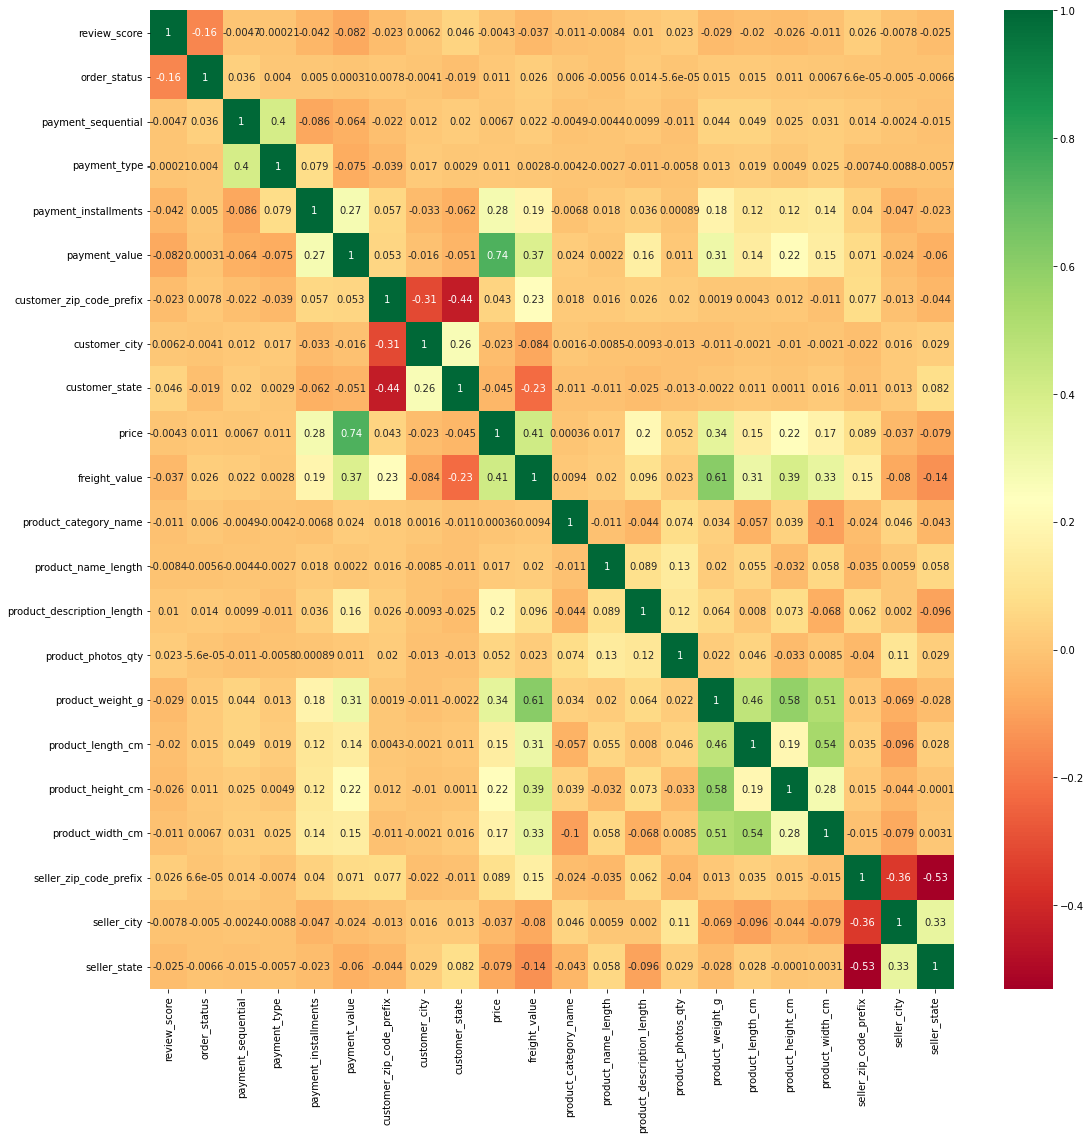

In [100]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize=(18,18))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [ ]:
### Bassed on correlation following columns will be dropped
1. Payment_value
2. Product_height_cm
3. Product_width_cm
4. Product_weight_g
5. Payment_installments
6. seller_state

In [82]:
data.columns

Index(['review_score', 'order_status', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'price', 'freight_value',
       'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [83]:
columns = ['product_name_length', 'product_description_length', 'product_weight_g', 'product_length_cm', 'product_height_cm',
          'product_width_cm', 'seller_zip_code_prefix', 'customer_zip_code_prefix']

In [84]:
data = data.drop(columns, axis=1)

In [85]:
data.shape

(117013, 14)

In [86]:
data.shape

(117013, 14)

In [109]:
data.to_csv('C:\\Users\\rahul.goyal\\Desktop\\Data Science\\Machine Learning/Projects/final.csv')

In [110]:
df = pd.read_csv('final.csv')
df.head()

,Unnamed: 0,review_score,order_status,payment_sequential,payment_type,payment_installments,payment_value,customer_city,customer_state,price,freight_value,product_category_name,product_photos_qty,seller_city,seller_state
0,0,4,2,1,1,8,397.26,2559,25,185.0,13.63,32,1.0,503,22
1,1,4,2,1,1,8,397.26,2559,25,185.0,13.63,32,1.0,503,22
2,2,4,2,1,1,2,26.17,2559,25,17.9,8.27,73,3.0,466,22
3,3,3,2,1,1,1,16.39,2559,25,9.0,7.39,30,1.0,517,22
4,4,5,2,1,2,1,70.89,2559,25,49.9,20.99,40,2.0,507,22


In [111]:
df.drop(['Unnamed: 0'], axis=1,inplace = True)

In [112]:
df.head()

,review_score,order_status,payment_sequential,payment_type,payment_installments,payment_value,customer_city,customer_state,price,freight_value,product_category_name,product_photos_qty,seller_city,seller_state
0,4,2,1,1,8,397.26,2559,25,185.0,13.63,32,1.0,503,22
1,4,2,1,1,8,397.26,2559,25,185.0,13.63,32,1.0,503,22
2,4,2,1,1,2,26.17,2559,25,17.9,8.27,73,3.0,466,22
3,3,2,1,1,1,16.39,2559,25,9.0,7.39,30,1.0,517,22
4,5,2,1,2,1,70.89,2559,25,49.9,20.99,40,2.0,507,22


In [113]:
df = data.copy()

In [114]:
df.shape

(117013, 14)

#### Dataframe ready after feature engineering

## Train Test Split

In [115]:
X = df.drop('review_score', axis=1)
y = df['review_score']

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [117]:
X_train.shape

(87759, 13)

In [118]:
X_test.shape

(29254, 13)

### Model creation and training the model

In [116]:
###from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [119]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [121]:
y_pred = model.predict(X_test)

In [122]:
y_pred

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [123]:
model.score(X_test, y_test)

0.6392630067683052

In [124]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.combine import SMOTEENN

In [125]:
print(classification_report(y_test, y_pred, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.74      0.40      0.52      3729

   micro avg       0.74      0.40      0.52      3729
   macro avg       0.37      0.20      0.26      3729
weighted avg       0.74      0.40      0.52      3729



In [126]:
print(confusion_matrix(y_test, y_pred))

[[ 1492    18    35   104  2080]
 [   65   232     6    56   668]
 [   93     8   451   103  1805]
 [  105    16    61  1191  4213]
 [  265    20   147   685 15335]]


In [127]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [128]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=5)

In [129]:
Xr_train.shape

(150706, 13)

In [130]:
Xr_test.shape

(50236, 13)

In [108]:
#### from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xr_train = sc.fit_transform(Xr_train)
Xr_test = sc.transform(Xr_test)

In [131]:
from sklearn.ensemble import RandomForestClassifier
model_r = RandomForestClassifier()
model_r.fit(Xr_train,yr_train)

RandomForestClassifier()

In [132]:
yr_pred = model_r.predict(Xr_test)

In [133]:
yr_pred

array([1, 3, 3, ..., 4, 3, 1], dtype=int64)

In [134]:
print(classification_report(yr_test, yr_pred, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.91      0.90      0.90     11543

   micro avg       0.91      0.90      0.90     11543
   macro avg       0.46      0.45      0.45     11543
weighted avg       0.91      0.90      0.90     11543



In [135]:
model_r.score(Xr_test, yr_test)*100

89.01385460625846

#### Model created with 89% of accuracy rate

#### Saving the model

In [136]:
import pickle

In [137]:
filename = 'ecom_model.pkl'

In [138]:
pickle.dump(model_r, open(filename, 'wb'))

In [140]:
load_model = pickle.load(open(filename, 'rb'))

In [141]:
load_model.score(Xr_test, yr_test)

0.8901385460625846

In [149]:
data = [[2, 1, 1, 1, 16.39, 2559, 25, 9, 7.39, 30, 1.0, 517, 22]]

# create the pandad dataframe
new_df = pd.DataFrame(data, columns = ['order_status', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value','customer_city', 'customer_state', 'price', 'freight_value', 'product_category_name', 'product_photos_qty', 'seller_city', 'seller_state'])

In [150]:
new_df.head()

,order_status,payment_sequential,payment_type,payment_installments,payment_value,customer_city,customer_state,price,freight_value,product_category_name,product_photos_qty,seller_city,seller_state
0,2,1,1,1,16.39,2559,25,9,7.39,30,1.0,517,22


In [151]:
single = model_r.predict(new_df)

In [152]:
print(single)

[3]


In [157]:
probability = model_r.predict_proba(new_df)[:,1]

In [158]:
probability

array([0.01])

In [187]:
single = model_r.predict(new_df)

if single==1:
    print("Customer not happy, review score: {}".format(single))
    
elif single==2:
    print("Cutomer not happy, review score: {}".format(single))
    
else: 
    print("Customer is satisfied, review score: {}".format(single))

Customer not happy, review score: [1]


In [148]:
df.head(10)

,review_score,order_status,payment_sequential,payment_type,payment_installments,payment_value,customer_city,customer_state,price,freight_value,product_category_name,product_photos_qty,seller_city,seller_state
0,4,2,1,1,8,397.26,2559,25,185.00,13.63,32,1.0,503,22
1,4,2,1,1,8,397.26,2559,25,185.00,13.63,32,1.0,503,22
2,4,2,1,1,2,26.17,2559,25,17.90,8.27,73,3.0,466,22
3,3,2,1,1,1,16.39,2559,25,9.00,7.39,30,1.0,517,22
4,5,2,1,2,1,70.89,2559,25,49.90,20.99,40,2.0,507,22
5,5,2,1,3,1,72.43,2559,25,59.00,13.43,40,2.0,507,22
6,5,2,1,1,1,41.96,2559,25,31.00,10.96,32,2.0,431,22
7,2,2,1,1,1,150.28,2559,25,138.90,11.38,73,1.0,507,22
8,5,2,1,1,4,89.32,2559,25,12.99,9.34,54,1.0,517,22
9,5,2,1,1,4,89.32,2559,25,12.99,9.34,54,1.0,517,22


# Hyper Parameter Tuning
### Random Search CV

In [122]:
from sklearn.model_selection import RandomizedSearchCV

In [123]:
# RandomizedSearch CV
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of features to consider at every split
max_features=['auto', 'sqrt']
# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5, 20, num=6)]
# Minimum number of samples required to split a node
min_samples_split=[2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf=[1, 2, 5, 10]

In [124]:
# Create the random grid

random_grid={'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf}

In [125]:
rf_random=RandomizedSearchCV(estimator=model, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [126]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.3min
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.4min
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.4min
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.4min
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.6min
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 2.4min
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 2.6min
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=110

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 8, 11, 14, 17, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [127]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 17}

In [128]:
rf_random.score(x_test,y_test)*100

-233.41765228686677

In [129]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=17, max_features='sqrt', n_estimators=1000)

In [132]:
model1 = RandomForestClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=17)

In [133]:
model1.fit(x_train, y_train)

RandomForestClassifier(max_depth=17, max_features='sqrt', n_estimators=1000)

In [134]:
model1.score(x_test, y_test)*100

61.171121897860125

In [135]:
model.score(x_test, y_test)*100

64.02201408354414